In [2]:
from src.visualization.visualize import display_source

### Feature Engineering

#### Combining Common Phrases

Having cleaned our data we wish to combine common phrases into bigrams, trigrams, and quadgrams. This helps to ensure that each token in our final representation of our text is an independent unit of information.

The `data_combine_phrases` method uses the full corpus to detect common phrases and combine them into bigrams, trigrams, and quadgrams. when this method is run it saves a copy of the two required `Phrases` models to the `model` folder. This method depends on the following class.
 * `Phrases` from `gensim.models`
 
Once `data_combine_phrases` has built a phrase model for the provided data, we can combine phrases for an unseen document.

The `doc_combine_phrases` method will combine common phrases into $n$-grams for an unseen document. This method has the following dependencies.
 * `Phrases` from `gensim.models`
 * The model trained by `data_combine_phrases`

##### `data_combine_phrases` method

In [4]:
from src.data.data_cleaning import data_combine_phrases
display_source(data_combine_phrases)

```python
def data_combine_phrases(
    processed_data: List[List[str]], prefix: str
) -> List[List[str]]:
    """data_combine_phrases. Takes a corpus of cleaned documents and combines
    common phrases into bigrams, trigrams, and quadgrams.

    Parameters
    ----------
    processed_data : List[List[str]]
        processed_data output from data processor.
    prefix : str
        prefix to identify saved model.

    Returns
    -------
    List[List[str]]
    """
    phrase_model_1 = Phrases(processed_data)
    phrase_model_1.save(f'../model/{prefix}-phrase_model_1.pkl')
    phrase_model_2 = Phrases(phrase_model_1[processed_data], min_count=1)
    phrase_model_2.save(f'../model/{prefix}-phrase_model_2.pkl')
    data_phrases = list(phrase_model_2[phrase_model_1[processed_data]])
    return data_phrases

```

##### Training on full dataset

In [33]:
title_phrases = DataProcessor.data_combine_phrases(tqdm(titles_processed), 'title')

100%|██████████| 9666/9666 [00:00<00:00, 52908.02it/s]


In [34]:
description_phrases = DataProcessor.data_combine_phrases(tqdm(descriptions_processed), 'description')

100%|██████████| 9666/9666 [00:10<00:00, 932.76it/s] 


##### `doc_combine_phrases` method

In [35]:
display_source(DataProcessor.doc_combine_phrases)

```python
def doc_combine_phrases(processed_doc, prefix):
    """doc_combine_phrases. Takes a processed document and combines common
    phrases into bigrams, trigrams, and quadgrams. data_combine_phrases must
    run before doc_combine_phrases.

    Parameters
    ----------
    processed_doc : list of strings
        Takes output from doc_processor.
    prefix : string
        prefix to identify saved model.
    """
    try:
        phrase_model_1 = Phrases.load(f'../model/{prefix}-phrase_model_1.pkl')
        phrase_model_2 = Phrases.load(f'../model/{prefix}-phrase_model_2.pkl')
    except:
        print('Call `data_combine_phrases` on processed data to build a phrase model')
        pass
    doc_phrases = list(phrase_model_2[phrase_model_2[processed_doc]])
    return doc_phrases

```

##### Example output

In [36]:
title_grams = DataProcessor.doc_combine_phrases(title_clean, 'title')
description_grams = DataProcessor.doc_combine_phrases(description_clean, 'description')
print(f'{title_grams}\n\n{description_grams}')

['data', 'analyst']

['data', 'analyst', 'need', 'contract', 'opportunity', 'yoh_scientific', 'client', 'locate', 'devens', 'able', 'work_remotely_foreseeable_future', 'also', 'capable', 'commute', 'either', 'devens', 'new_brunswick_nj', 'return', 'work', 'possible', 'month_contract_pay_rate', 'job', 'work', 'collaborative', 'team', 'data', 'scientist_statistician', 'biologics_development', 'scientist', 'retrieve', 'transform', 'join', 'analyze', 'drug', 'process', 'development', 'laboratory', 'manufacturing', 'data', 'strong', 'background', 'data', 'science', 'analysis', 'visualization', 'proficiency_python', 'sql', 'rest_api', 'related', 'skill', 'familiarity', 'html_javascript', 'flask', 'shiny', 'similar', 'prefer', 'familiarity', 'chemistry_biology', 'engineering', 'concept', 'relevant', 'biologics_development', 'description', 'strong_communication_presentation', 'skill', 'capable', 'translate', 'end_user', 'requirement', 'data', 'retrieval', 'functional', 'programmatic', 'solutio

##### Description grams word cloud

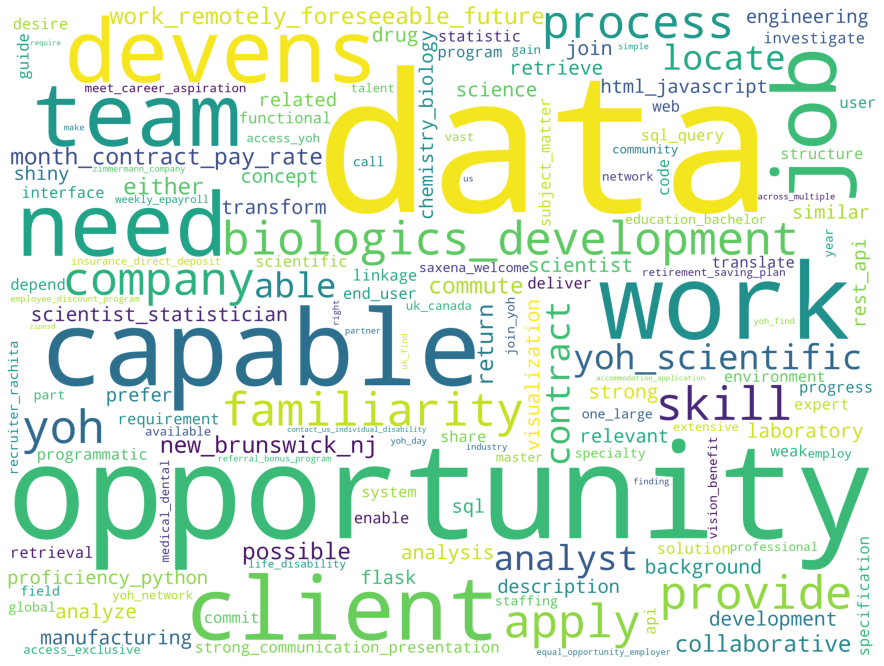

In [82]:
description_grams_text = ' '.join(description_grams)
fig = make_wordcloud(description_grams_text)

In [83]:
fig.savefig('../images/gram_wordcloud.png')

### Processed Data Storage

As we saw above. It takes around ten minutes in total to execute data cleaning and feature engineering on the full data set. For this reason it is useful to store our processed data for future use. Below we package our raw data with our processed data in a list of dictionaries and save the resulting object as a pickle file.

#### Combining raw data and processed data for storage

In [38]:
data_records = data.to_dict('records')
for post, description_tokens, title_tokens in tqdm(zip(data_records, description_phrases, title_phrases)):
    post['title_tokens'] = title_tokens
    post['description_tokens'] = description_tokens

9666it [00:00, 576046.35it/s]


#### Inspecting the first record

In [39]:
data_records[1]

{'title': 'QA Engineer',
 'url': 'https://www.careerjet.com/jobad/usd99666605afa1b6c5df56a4819c7a373',
 'description': "\\n  \\n    We’d love to hear from you if you are looking for:  Start-up energy working with a brilliant and passionate team $300 billion market opportunity Exponential growth (6 straight quarters of 50-100%+ quarter over quarter growth) Open communication environment based on high integrity values Rockstar teammates. You will be working with a strong team with prior work experience at Amazon, Microsoft, Alibaba, Nivida, etc.   About jerry.ai:  Jerry.ai is building the first financial platform for your car that helps people optimize the cost and experience of owning a car (making ownership easy & affordable). There are 240M cars in the US alone. For most people, cars are one of the most expensive assets they own and families on average spend 20% of their income on car expenses, making this a massive market.  We have started with helping people optimize the cost of car

#### Saving to pickle file

The line below should only be run if the `processed_data` file needs to be updated.

```python
with open('../data/processed_data.pkl', mode='wb') as file:
    pickle.dump(data_records, file)
```